In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pypfopt import EfficientFrontier, expected_returns, risk_models
import yfinance as yf
import warnings

# === Load and combine adjusted close prices ===
prices = pd.DataFrame()

start_date     = '2012-01-01'
end_date       = '2021-12-31'

sector_etfs = ['SP500-50', 'SP500-25', 'SP500-30', 'SP500-40', 
           'SP500-35', 'SP500-20', 'SP500-45', 'SP500-15', 'SP500-60', 'SP500-55', 'GSPE'] 
benchmark      = 'GSPC' # S&P 500 Index

tickers_to_load = sector_etfs + [benchmark]

# === Configuration Via yfinance ===
# # Download historical data once
# ohlc   = yf.download(tickers_to_load, start=start_date, end=end_date, auto_adjust=False)
# prices = ohlc['Adj Close'].dropna(how='all')
# prices.replace([np.inf, -np.inf], np.nan, inplace=True)
# prices.fillna(0.01, inplace=True)


# === Configuration Via Local CSV Files ===
# Load data from CSV files
data_path = "/Users/benjaminli/Code/MyTradingProjects/DRL_Portfolio_Optimisation/DRL-Portfolio-Optimisation/data"

for ticker in tickers_to_load:
    file_path = os.path.join(data_path, f"{ticker}.csv")
    df = pd.read_csv(file_path, index_col="Date", parse_dates=True)
    prices[ticker] = df["Adj Close"]

prices.replace([np.inf, -np.inf], np.nan, inplace=True)
prices = prices.fillna(method='ffill')
prices = prices.iloc[1:]
prices = prices.apply(pd.to_numeric, errors='coerce').astype(float)

# Filter by date range
prices = prices[(prices.index >= start_date) & (prices.index <= end_date)]

prices


/var/folders/r4/bpvrknrd5mv0mfm2zd9tfsx40000gn/T/ipykernel_6279/2213208644.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  prices = prices.fillna(method='ffill')


,SP500-50,SP500-25,SP500-30,SP500-40,SP500-35,SP500-20,SP500-45,SP500-15,SP500-60,SP500-55,GSPE,GSPC
Date,,,,,,,,,,,,
2012-01-03,130.100006,311.890015,336.880005,180.309998,407.470001,298.410004,417.190002,217.910004,130.970001,179.710007,533.770020,1277.060059
2012-01-04,129.190002,313.709991,334.970001,179.119995,405.209991,299.350006,417.910004,219.259995,129.250000,178.880005,535.159973,1277.300049
2012-01-05,128.339996,315.410004,334.140015,181.940002,406.059998,299.739990,419.880005,220.009995,129.940002,179.089996,530.929993,1281.060059
2012-01-06,126.279999,316.529999,332.160004,180.580002,406.399994,299.940002,420.500000,219.809998,129.839996,178.119995,529.039978,1277.810059
2012-01-09,125.959999,316.640015,332.529999,181.360001,406.769989,301.790009,420.339996,220.600006,129.020004,178.259995,531.409973,1280.699951
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,269.609985,1604.099976,785.119995,646.500000,1625.569946,879.299988,3041.120117,555.320007,313.200012,354.369995,418.369995,4725.790039
2021-12-27,272.059998,1617.449951,793.219971,652.700012,1642.589966,888.530029,3107.459961,563.500000,319.600006,356.130005,427.739990,4791.189941
2021-12-28,271.279999,1619.339966,798.179993,653.010010,1637.969971,893.070007,3089.100098,566.630005,320.970001,359.450012,427.250000,4786.350098


Error on 2012-11-14 00:00:00: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible')
Error on 2012-11-15 00:00:00: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible')
Error on 2012-12-14 00:00:00: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
Error on 2014-10-15 00:00:00: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible')
Error on 2014-10-16 00:00:00: at least one of the assets must have an expected return exceeding the risk-free rate
Error on 2015-07-08 00:00:00: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible')
Error on 2015-07-09 00:00:00: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')


/Users/benjaminli/miniforge3/envs/DRL_Portfolio_Optimisation/lib/python3.10/site-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Error on 2015-08-21 00:00:00: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible')
Error on 2015-08-24 00:00:00: at least one of the assets must have an expected return exceeding the risk-free rate
Error on 2015-08-25 00:00:00: at least one of the assets must have an expected return exceeding the risk-free rate
Error on 2015-08-26 00:00:00: at least one of the assets must have an expected return exceeding the risk-free rate
Error on 2015-08-27 00:00:00: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible')
Error on 2015-08-31 00:00:00: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible')
Error on 2015-09-01 00:00:00: at least one of the assets must have an expected return exceeding the risk-free rate
Error on 2015-09-02 00:00:00: at least one of the assets must have an expected return exceeding the risk-free rate
Error on 2015-09-03 00:00:00: at

/Users/benjaminli/miniforge3/envs/DRL_Portfolio_Optimisation/lib/python3.10/site-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Error on 2015-10-02 00:00:00: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible')
Error on 2015-10-06 00:00:00: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible')
Error on 2015-10-07 00:00:00: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible')
Error on 2015-10-08 00:00:00: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible')
Error on 2015-10-14 00:00:00: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible')
Error on 2016-01-12 00:00:00: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible')
Error on 2016-01-13 00:00:00: at least one of the assets must have an expected return exceeding the risk-free rate
Error on 2016-01-14 00:00:00: at least one of the assets must have an expected return exceeding the

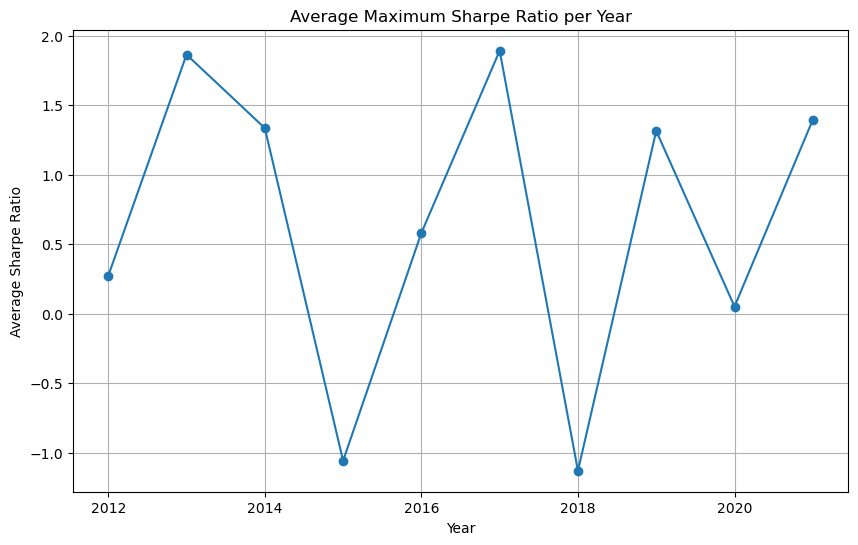

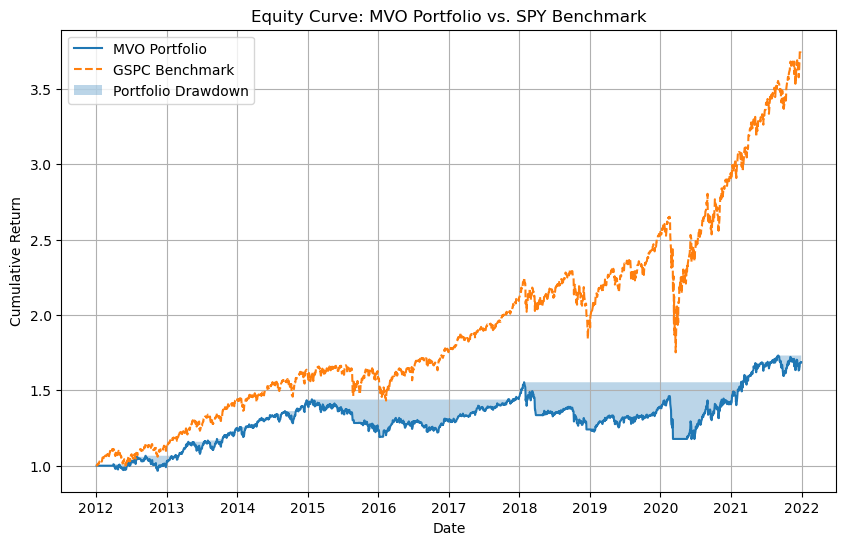


Portfolio Benchmark:
 Sharpe Ratio:          0.45
 CAGR:                  5.38%
 Cumulative return:     68.63%
 Annualized return:     5.38%
 Annualized volatility: 12.08%
 Max drawdown:          -24.27%

SPX Benchmark:
 SPX Sharpe ratio:          0.86
 SPX CAGR:                  14.15%
 SPX Cumulative return:     274.20%
 SPX Annualized return:     14.15%
 SPX Annualized volatility: 16.37%
 SPX Max drawdown:          -33.92%


In [14]:
# Separate out SPY series for later
spy_prices = prices[benchmark].copy()

# Sector prices only for optimization
sector_prices = prices[sector_etfs]

lookback       = 60
bounds         = (0, 0.3)

daily_sharpe   = {}
daily_weights  = {}

def make_psd(cov):
    eigvals, eigvecs = np.linalg.eigh(cov)
    eigvals[eigvals < 0] = 0.0  # Set negative eigenvalues to 0
    psd_matrix = eigvecs @ np.diag(eigvals) @ eigvecs.T
    psd_matrix = (psd_matrix + psd_matrix.T) / 2  # Ensure symmetry
    # Add regularization to stabilize the matrix
    # psd_matrix += np.eye(psd_matrix.shape[0]) * 1e-6
    return psd_matrix

for current_date in sector_prices.index[lookback:]:
    window = sector_prices.loc[:current_date].iloc[-lookback:]
    if len(window) < lookback:
        continue

    try:

        # Ensure no missing or invalid data
        if window.isnull().values.any() or (window < 0).values.any():
            print(f"Skipping {current_date} due to invalid data.")
            continue

        mu = expected_returns.mean_historical_return(window)
        shrink_cov = risk_models.CovarianceShrinkage(window).ledoit_wolf()
        psd_cov = make_psd(shrink_cov)

        ef = EfficientFrontier(mu, psd_cov, weight_bounds=bounds)
        ef.max_sharpe(risk_free_rate = 0)

        weights = ef.clean_weights()
        daily_weights[current_date] = pd.Series(weights)
        _, _, sharpe = ef.portfolio_performance(verbose=False)
        daily_sharpe[current_date] = sharpe

    except Exception as e:
        print(f"Error on {current_date}: {e}")

# Build Series/DataFrame
daily_sharpe_series = pd.Series(daily_sharpe).sort_index()
daily_weights_df    = pd.DataFrame(daily_weights).T.sort_index()

# Exclude days where the Sharpe ratio is NaN
daily_sharpe_series = daily_sharpe_series.dropna()

# Simulate portfolio returns
asset_rets = sector_prices.pct_change().shift(-1)
port_rets  = (daily_weights_df * asset_rets).sum(axis=1).dropna()

# Annual & overall Sharpe
annual_returns = port_rets.resample('YE').apply(lambda r: (1 + r).prod() - 1)
annual_vols    = port_rets.resample('YE').std() * np.sqrt(252)
annual_sharpe = annual_returns / annual_vols

# Portfolio performance
num_days = len(port_rets)
cum_pnl     = (1 + port_rets).cumprod()
cum_return  = cum_pnl.iloc[-1] - 1
cagr = (cum_pnl.iloc[-1]) ** (252 / num_days) - 1
num_days    = len(port_rets)
ann_return  = (1 + cum_return) ** (252 / num_days) - 1
ann_vol     = port_rets.std() * np.sqrt(252)
running_max = cum_pnl.cummax()
drawdown    = (cum_pnl - running_max) / running_max
max_dd      = drawdown.min()
overall_avg_sharpe = ann_return / ann_vol

# === Benchmark SPY ===
# align SPY with portfolio
spy = spy_prices.reindex(port_rets.index).ffill()
spy_rets = spy.pct_change().shift(-1).dropna()
spy_cum  = (1 + spy_rets).cumprod()

spy_cagr = (spy_cum.iloc[-1]) ** (252 / len(spy_rets)) - 1
spy_cum_return = spy_cum.iloc[-1] - 1
spy_ann_return = (1 + spy_cum_return) ** (252 / len(spy_rets)) - 1
spy_ann_vol    = spy_rets.std() * np.sqrt(252)
spy_max_dd     = ((spy_cum - spy_cum.cummax()) / spy_cum.cummax()).min()
spy_sharpe = spy_ann_return / spy_ann_vol

# === Plots ===
plt.figure(figsize=(10,6))
plt.plot(annual_sharpe.index.year, annual_sharpe.values, marker='o', linestyle='-')
plt.title("Average Maximum Sharpe Ratio per Year")
plt.xlabel("Year")
plt.ylabel("Average Sharpe Ratio")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.plot(cum_pnl, label='MVO Portfolio')
plt.plot(spy_cum, label=f'{benchmark} Benchmark', linestyle='--')
plt.fill_between(drawdown.index, cum_pnl, running_max, where=drawdown<0, alpha=0.3, label='Portfolio Drawdown')

plt.title('Equity Curve: MVO Portfolio vs. SPY Benchmark')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()


print("\nPortfolio Benchmark:")
print(f" Sharpe Ratio:          {overall_avg_sharpe:.2f}")
print(f" CAGR:                  {cagr:.2%}")
print(f" Cumulative return:     {cum_return:.2%}")
print(f" Annualized return:     {ann_return:.2%}")
print(f" Annualized volatility: {ann_vol:.2%}")
print(f" Max drawdown:          {max_dd:.2%}")


print("\nSPX Benchmark:")
print(f" SPX Sharpe ratio:          {spy_sharpe:.2f}")
print(f" SPX CAGR:                  {spy_cagr:.2%}")
print(f" SPX Cumulative return:     {spy_cum_return:.2%}")
print(f" SPX Annualized return:     {spy_ann_return:.2%}")
print(f" SPX Annualized volatility: {spy_ann_vol:.2%}")
print(f" SPX Max drawdown:          {spy_max_dd:.2%}")
